# EDA 프로젝트 데이터 다루기 연습
## [US Accidents (2016 - 2023)](https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents)
A Countrywide Traffic Accident Dataset (2016 - 2023)

참고:
* [60+ Insights📈📊📚 Extraction-US Accident Analysis](https://www.kaggle.com/code/satyabrataroy/60-insights-extraction-us-accident-analysis)
* [Geospatial Insights🌍- US Car Accidents 🚘](https://www.kaggle.com/code/devbilalkhan/geospatial-insights-us-car-accidents)

In [267]:
import pandas as pd
import numpy as  np

In [21]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
%matplotlib inline

import seaborn as sns

import calendar

import plotly as pt
import plotly.express as px
import plotly.figure_factory as ff

from pylab import *

import matplotlib.patheffects as PathEffects

In [22]:
# %pip install descartes

In [23]:
# %pip install geopandas

In [24]:
import descartes
import geopandas as gpd

In [25]:
# %pip install fuzzywuzzy

In [26]:
# %pip install python-levenshtein

In [27]:
from Levenshtein import distance

In [28]:
from itertools import product

In [29]:
from fuzzywuzzy import fuzz, process

In [30]:
# %pip install scipy

In [31]:
from scipy.spatial.distance import pdist, squareform

In [32]:
from shapely.geometry import Point, Polygon

In [33]:
# %pip install geoplot

In [34]:
import geoplot
from geopy.geocoders import Nominatim

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
# 데이터 불러오기
df = pd.read_csv("./US_Accidents_March23.csv")

In [38]:
# 데이터 row, column 수 확인
print(f"the dataset contains, rows: {df.shape[0]} * colums: {df.shape[1]}")

the dataset contains, rows: 7728394 * colums: 46


In [40]:
# Start_Time, End_Time을 Datetime 형태로 변경
df.Start_Time = pd.to_datetime(df.Start_Time)
df.End_Time = pd.to_datetime(df.End_Time)

In [66]:
print(df['Start_Time'].max())
print(df['End_Time'].max())

2023-03-31 23:30:00
2023-03-31 23:59:00


## Location Analysis
### City

In [41]:
city_df = pd.DataFrame(df['City'].value_counts()).reset_index().rename(columns={'index':'City', 'City':'Cases'})

In [43]:
top10_cities = pd.DataFrame(city_df.head(10))
top10_cities

,City,Cases
0,Miami,186917
1,Houston,169609
2,Los Angeles,156491
3,Charlotte,138652
4,Dallas,130939
5,Orlando,109733
6,Austin,97359
7,Raleigh,86079
8,Nashville,72930
9,Baton Rouge,71588


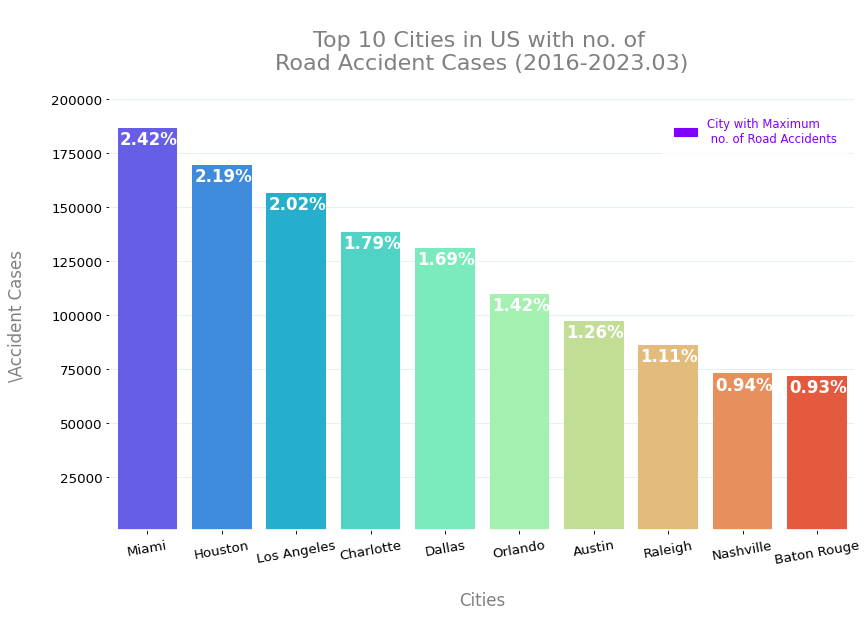

In [99]:
fig, ax = plt.subplots(figsize = (12, 7), dpi = 80)

cmap = cm.get_cmap('rainbow', 10)

clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax = sns.barplot(y=top10_cities['Cases'], x=top10_cities['City'], palette='rainbow')

total = sum(city_df['Cases'])

for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-7500, str(round((i.get_height()/total)*100, 2)) + '%', fontsize=15, weight='bold', color='white')

plt.title('\nTop 10 Cities in US with no. of \nRoad Accident Cases (2016-2023.03)\n', size=20, color='grey')

plt.ylim(100, 200000)

plt.xticks(rotation=10, fontsize=12)
plt.yticks(fontsize=12)

ax.set_xlabel('\nCities\n', fontsize=15, color='grey')
ax.set_ylabel('\Accident Cases\n', fontsize=15, color='grey')

for i in ['bottom', 'left']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.5)

right_side = ax.spines["right"]
right_side.set_visible(False)

top_side = ax.spines["top"]
top_side.set_visible(False)

ax.set_axisbelow(True)
ax.grid(color="#b2d6c7", linewidth=1, axis='y', alpha=.3)

MA = mpatches.Patch(color=clrs[0], label='City with Maximum\n no. of Road Accidents')
ax.legend(handles=[MA], prop={'size':10.5}, loc='best', borderpad=1, labelcolor=clrs[0], edgecolor='white')

plt.show()

In [63]:
highest_cases = city_df.Cases[0]
# 가장 case가 많은 도시의 케이스 수
print(highest_cases)
# 2016-2023.03 약 8년간 일어난 사건의 수
# NOTE: 2023년은 3월까지의 데이터만 있어서. 2023년도에 일어난 사건들은 drop하는게 '연간'을 따지기엔 적합할 듯.
print(round(highest_cases/8))
# 하루에 64건 정도
print(round(highest_cases/(8*365)))

186917
23365
64


In [120]:
states = gpd.read_file('./data/cb_2018_us_state_500k.dbf')

In [172]:
# latitude, longtitude
def get_location(city):
    print("city:", city)
    address = city
    geolocator = Nominatim(user_agent="soomni_geo_test", timeout=10)
    location = geolocator.geocode(address)
    return location

##

def gen_top10_dict(city_list):
    top10_lat_dictionary = {}
    top10_lng_dictionary = {}

    for i in city_list:
        location = get_location(i)
        print("location:", location)

        top10_lat_dictionary[i] = location.latitude
        top10_lng_dictionary[i] = location.longitude
    return top10_lat_dictionary, top10_lng_dictionary


In [173]:
# top 10 cities
top10_list = list(city_df.City.head(10))

top10_lat_dictionary = {}
top10_lng_dictionary = {}

result = gen_top10_dict(top10_list)
print("result:", result)


city: Miami
location: Miami, Miami-Dade County, Florida, United States
city: Houston
location: Houston, Harris County, Texas, United States
city: Los Angeles
location: Los Angeles, Los Angeles County, California, United States
city: Charlotte
location: Charlotte, Mecklenburg County, North Carolina, United States
city: Dallas
location: Dallas, Dallas County, Texas, United States
city: Orlando
location: Orlando, Orange County, Florida, United States
city: Austin
location: Austin, Travis County, Texas, United States
city: Raleigh
location: Raleigh, Wake County, North Carolina, United States
city: Nashville
location: Nashville-Davidson, Davidson County, Middle Tennessee, Tennessee, United States
city: Baton Rouge
location: Baton Rouge, East Baton Rouge Parish, Louisiana, United States
result: ({'Miami': 25.7741728, 'Houston': 29.7589382, 'Los Angeles': 34.0536909, 'Charlotte': 35.2272086, 'Dallas': 32.7762719, 'Orlando': 28.5421109, 'Austin': 30.2711286, 'Raleigh': 35.7803977, 'Nashville':

{
	"name": "GeocoderUnavailable",
	"message": "HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Miami&format=json&limit=1 (Caused by ReadTimeoutError(\"HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)\"))",
	"stack": "---------------------------------------------------------------------------
TimeoutError                              Traceback (most recent call last)
File /opt/anaconda3/envs/eda/lib/python3.11/site-packages/urllib3/connectionpool.py:467, in HTTPConnectionPool._make_request(self, conn, method, url, body, headers, retries, timeout, chunked, response_conn, preload_content, decode_content, enforce_content_length)
    466 try:
--> 467     self._validate_conn(conn)
    468 except (SocketTimeout, BaseSSLError) as e:

File /opt/anaconda3/envs/eda/lib/python3.11/site-packages/urllib3/connectionpool.py:1099, in HTTPSConnectionPool._validate_conn(self, conn)
   1098 if conn.is_closed:
-> 1099     conn.connect()
   1101 # TODO revise this, see https://github.com/urllib3/urllib3/issues/2791

File /opt/anaconda3/envs/eda/lib/python3.11/site-packages/urllib3/connection.py:653, in HTTPSConnection.connect(self)
    651 server_hostname_rm_dot = server_hostname.rstrip(\".\")
--> 653 sock_and_verified = _ssl_wrap_socket_and_match_hostname(
    654     sock=sock,
    655     cert_reqs=self.cert_reqs,
    656     ssl_version=self.ssl_version,
    657     ssl_minimum_version=self.ssl_minimum_version,
    658     ssl_maximum_version=self.ssl_maximum_version,
    659     ca_certs=self.ca_certs,
    660     ca_cert_dir=self.ca_cert_dir,
    661     ca_cert_data=self.ca_cert_data,
    662     cert_file=self.cert_file,
    663     key_file=self.key_file,
    664     key_password=self.key_password,
    665     server_hostname=server_hostname_rm_dot,
    666     ssl_context=self.ssl_context,
    667     tls_in_tls=tls_in_tls,
    668     assert_hostname=self.assert_hostname,
    669     assert_fingerprint=self.assert_fingerprint,
    670 )
    671 self.sock = sock_and_verified.socket

File /opt/anaconda3/envs/eda/lib/python3.11/site-packages/urllib3/connection.py:806, in _ssl_wrap_socket_and_match_hostname(sock, cert_reqs, ssl_version, ssl_minimum_version, ssl_maximum_version, cert_file, key_file, key_password, ca_certs, ca_cert_dir, ca_cert_data, assert_hostname, assert_fingerprint, server_hostname, ssl_context, tls_in_tls)
    804         server_hostname = normalized
--> 806 ssl_sock = ssl_wrap_socket(
    807     sock=sock,
    808     keyfile=key_file,
    809     certfile=cert_file,
    810     key_password=key_password,
    811     ca_certs=ca_certs,
    812     ca_cert_dir=ca_cert_dir,
    813     ca_cert_data=ca_cert_data,
    814     server_hostname=server_hostname,
    815     ssl_context=context,
    816     tls_in_tls=tls_in_tls,
    817 )
    819 try:

File /opt/anaconda3/envs/eda/lib/python3.11/site-packages/urllib3/util/ssl_.py:465, in ssl_wrap_socket(sock, keyfile, certfile, cert_reqs, ca_certs, server_hostname, ssl_version, ciphers, ssl_context, ca_cert_dir, key_password, ca_cert_data, tls_in_tls)
    463     pass
--> 465 ssl_sock = _ssl_wrap_socket_impl(sock, context, tls_in_tls, server_hostname)
    466 return ssl_sock

File /opt/anaconda3/envs/eda/lib/python3.11/site-packages/urllib3/util/ssl_.py:509, in _ssl_wrap_socket_impl(sock, ssl_context, tls_in_tls, server_hostname)
    507     return SSLTransport(sock, ssl_context, server_hostname)
--> 509 return ssl_context.wrap_socket(sock, server_hostname=server_hostname)

File /opt/anaconda3/envs/eda/lib/python3.11/ssl.py:517, in SSLContext.wrap_socket(self, sock, server_side, do_handshake_on_connect, suppress_ragged_eofs, server_hostname, session)
    511 def wrap_socket(self, sock, server_side=False,
    512                 do_handshake_on_connect=True,
    513                 suppress_ragged_eofs=True,
    514                 server_hostname=None, session=None):
    515     # SSLSocket class handles server_hostname encoding before it calls
    516     # ctx._wrap_socket()
--> 517     return self.sslsocket_class._create(
    518         sock=sock,
    519         server_side=server_side,
    520         do_handshake_on_connect=do_handshake_on_connect,
    521         suppress_ragged_eofs=suppress_ragged_eofs,
    522         server_hostname=server_hostname,
    523         context=self,
    524         session=session
    525     )

File /opt/anaconda3/envs/eda/lib/python3.11/ssl.py:1104, in SSLSocket._create(cls, sock, server_side, do_handshake_on_connect, suppress_ragged_eofs, server_hostname, context, session)
   1103                 raise ValueError(\"do_handshake_on_connect should not be specified for non-blocking sockets\")
-> 1104             self.do_handshake()
   1105 except:

File /opt/anaconda3/envs/eda/lib/python3.11/ssl.py:1382, in SSLSocket.do_handshake(self, block)
   1381         self.settimeout(None)
-> 1382     self._sslobj.do_handshake()
   1383 finally:

TimeoutError: _ssl.c:989: The handshake operation timed out

The above exception was the direct cause of the following exception:

ReadTimeoutError                          Traceback (most recent call last)
File /opt/anaconda3/envs/eda/lib/python3.11/site-packages/urllib3/connectionpool.py:793, in HTTPConnectionPool.urlopen(self, method, url, body, headers, retries, redirect, assert_same_host, timeout, pool_timeout, release_conn, chunked, body_pos, preload_content, decode_content, **response_kw)
    792 # Make the request on the HTTPConnection object
--> 793 response = self._make_request(
    794     conn,
    795     method,
    796     url,
    797     timeout=timeout_obj,
    798     body=body,
    799     headers=headers,
    800     chunked=chunked,
    801     retries=retries,
    802     response_conn=response_conn,
    803     preload_content=preload_content,
    804     decode_content=decode_content,
    805     **response_kw,
    806 )
    808 # Everything went great!

File /opt/anaconda3/envs/eda/lib/python3.11/site-packages/urllib3/connectionpool.py:491, in HTTPConnectionPool._make_request(self, conn, method, url, body, headers, retries, timeout, chunked, response_conn, preload_content, decode_content, enforce_content_length)
    490         new_e = _wrap_proxy_error(new_e, conn.proxy.scheme)
--> 491     raise new_e
    493 # conn.request() calls http.client.*.request, not the method in
    494 # urllib3.request. It also calls makefile (recv) on the socket.

File /opt/anaconda3/envs/eda/lib/python3.11/site-packages/urllib3/connectionpool.py:469, in HTTPConnectionPool._make_request(self, conn, method, url, body, headers, retries, timeout, chunked, response_conn, preload_content, decode_content, enforce_content_length)
    468 except (SocketTimeout, BaseSSLError) as e:
--> 469     self._raise_timeout(err=e, url=url, timeout_value=conn.timeout)
    470     raise

File /opt/anaconda3/envs/eda/lib/python3.11/site-packages/urllib3/connectionpool.py:370, in HTTPConnectionPool._raise_timeout(self, err, url, timeout_value)
    369 if isinstance(err, SocketTimeout):
--> 370     raise ReadTimeoutError(
    371         self, url, f\"Read timed out. (read timeout={timeout_value})\"
    372     ) from err
    374 # See the above comment about EAGAIN in Python 3.

ReadTimeoutError: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)

The above exception was the direct cause of the following exception:

MaxRetryError                             Traceback (most recent call last)
File /opt/anaconda3/envs/eda/lib/python3.11/site-packages/requests/adapters.py:486, in HTTPAdapter.send(self, request, stream, timeout, verify, cert, proxies)
    485 try:
--> 486     resp = conn.urlopen(
    487         method=request.method,
    488         url=url,
    489         body=request.body,
    490         headers=request.headers,
    491         redirect=False,
    492         assert_same_host=False,
    493         preload_content=False,
    494         decode_content=False,
    495         retries=self.max_retries,
    496         timeout=timeout,
    497         chunked=chunked,
    498     )
    500 except (ProtocolError, OSError) as err:

File /opt/anaconda3/envs/eda/lib/python3.11/site-packages/urllib3/connectionpool.py:877, in HTTPConnectionPool.urlopen(self, method, url, body, headers, retries, redirect, assert_same_host, timeout, pool_timeout, release_conn, chunked, body_pos, preload_content, decode_content, **response_kw)
    874     log.warning(
    875         \"Retrying (%r) after connection broken by '%r': %s\", retries, err, url
    876     )
--> 877     return self.urlopen(
    878         method,
    879         url,
    880         body,
    881         headers,
    882         retries,
    883         redirect,
    884         assert_same_host,
    885         timeout=timeout,
    886         pool_timeout=pool_timeout,
    887         release_conn=release_conn,
    888         chunked=chunked,
    889         body_pos=body_pos,
    890         preload_content=preload_content,
    891         decode_content=decode_content,
    892         **response_kw,
    893     )
    895 # Handle redirect?

File /opt/anaconda3/envs/eda/lib/python3.11/site-packages/urllib3/connectionpool.py:877, in HTTPConnectionPool.urlopen(self, method, url, body, headers, retries, redirect, assert_same_host, timeout, pool_timeout, release_conn, chunked, body_pos, preload_content, decode_content, **response_kw)
    874     log.warning(
    875         \"Retrying (%r) after connection broken by '%r': %s\", retries, err, url
    876     )
--> 877     return self.urlopen(
    878         method,
    879         url,
    880         body,
    881         headers,
    882         retries,
    883         redirect,
    884         assert_same_host,
    885         timeout=timeout,
    886         pool_timeout=pool_timeout,
    887         release_conn=release_conn,
    888         chunked=chunked,
    889         body_pos=body_pos,
    890         preload_content=preload_content,
    891         decode_content=decode_content,
    892         **response_kw,
    893     )
    895 # Handle redirect?

File /opt/anaconda3/envs/eda/lib/python3.11/site-packages/urllib3/connectionpool.py:847, in HTTPConnectionPool.urlopen(self, method, url, body, headers, retries, redirect, assert_same_host, timeout, pool_timeout, release_conn, chunked, body_pos, preload_content, decode_content, **response_kw)
    845     new_e = ProtocolError(\"Connection aborted.\", new_e)
--> 847 retries = retries.increment(
    848     method, url, error=new_e, _pool=self, _stacktrace=sys.exc_info()[2]
    849 )
    850 retries.sleep()

File /opt/anaconda3/envs/eda/lib/python3.11/site-packages/urllib3/util/retry.py:515, in Retry.increment(self, method, url, response, error, _pool, _stacktrace)
    514     reason = error or ResponseError(cause)
--> 515     raise MaxRetryError(_pool, url, reason) from reason  # type: ignore[arg-type]
    517 log.debug(\"Incremented Retry for (url='%s'): %r\", url, new_retry)

MaxRetryError: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Miami&format=json&limit=1 (Caused by ReadTimeoutError(\"HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)\"))

During handling of the above exception, another exception occurred:

ConnectionError                           Traceback (most recent call last)
File /opt/anaconda3/envs/eda/lib/python3.11/site-packages/geopy/adapters.py:482, in RequestsAdapter._request(self, url, timeout, headers)
    481 try:
--> 482     resp = self.session.get(url, timeout=timeout, headers=headers)
    483 except Exception as error:

File /opt/anaconda3/envs/eda/lib/python3.11/site-packages/requests/sessions.py:602, in Session.get(self, url, **kwargs)
    601 kwargs.setdefault(\"allow_redirects\", True)
--> 602 return self.request(\"GET\", url, **kwargs)

File /opt/anaconda3/envs/eda/lib/python3.11/site-packages/requests/sessions.py:589, in Session.request(self, method, url, params, data, headers, cookies, files, auth, timeout, allow_redirects, proxies, hooks, stream, verify, cert, json)
    588 send_kwargs.update(settings)
--> 589 resp = self.send(prep, **send_kwargs)
    591 return resp

File /opt/anaconda3/envs/eda/lib/python3.11/site-packages/requests/sessions.py:703, in Session.send(self, request, **kwargs)
    702 # Send the request
--> 703 r = adapter.send(request, **kwargs)
    705 # Total elapsed time of the request (approximately)

File /opt/anaconda3/envs/eda/lib/python3.11/site-packages/requests/adapters.py:519, in HTTPAdapter.send(self, request, stream, timeout, verify, cert, proxies)
    517         raise SSLError(e, request=request)
--> 519     raise ConnectionError(e, request=request)
    521 except ClosedPoolError as e:

ConnectionError: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Miami&format=json&limit=1 (Caused by ReadTimeoutError(\"HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)\"))

During handling of the above exception, another exception occurred:

GeocoderUnavailable                       Traceback (most recent call last)
Cell In[83], line 10
      5 top10_lng_dictionary = {}
      7 for i in top10_list:
      8     # top10_lat_dictionary[i] = await latnlng(i)['latitude']
      9     # top10_lng_dictionary[i] = await latnlng(i)['longitude']
---> 10     top10_lat_dictionary[i] = lat(i)
     11     top10_lng_dictionary[i] = lng(i)
     13 print(top10_list)

Cell In[82], line 16, in lat(city)
     14 address = city
     15 geolocator = Nominatim(user_agent=\"soomni_geo_test\")
---> 16 location = geolocator.geocode(address)
     17 return location.latitude

File /opt/anaconda3/envs/eda/lib/python3.11/site-packages/geopy/geocoders/nominatim.py:297, in Nominatim.geocode(self, query, exactly_one, timeout, limit, addressdetails, language, geometry, extratags, country_codes, viewbox, bounded, featuretype, namedetails)
    295 logger.debug(\"%s.geocode: %s\", self.__class__.__name__, url)
    296 callback = partial(self._parse_json, exactly_one=exactly_one)
--> 297 return self._call_geocoder(url, callback, timeout=timeout)

File /opt/anaconda3/envs/eda/lib/python3.11/site-packages/geopy/geocoders/base.py:368, in Geocoder._call_geocoder(self, url, callback, timeout, is_json, headers)
    366 try:
    367     if is_json:
--> 368         result = self.adapter.get_json(url, timeout=timeout, headers=req_headers)
    369     else:
    370         result = self.adapter.get_text(url, timeout=timeout, headers=req_headers)

File /opt/anaconda3/envs/eda/lib/python3.11/site-packages/geopy/adapters.py:472, in RequestsAdapter.get_json(self, url, timeout, headers)
    471 def get_json(self, url, *, timeout, headers):
--> 472     resp = self._request(url, timeout=timeout, headers=headers)
    473     try:
    474         return resp.json()

File /opt/anaconda3/envs/eda/lib/python3.11/site-packages/geopy/adapters.py:494, in RequestsAdapter._request(self, url, timeout, headers)
    492         raise GeocoderServiceError(message)
    493     else:
--> 494         raise GeocoderUnavailable(message)
    495 elif isinstance(error, requests.Timeout):
    496     raise GeocoderTimedOut(\"Service timed out\")

GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Miami&format=json&limit=1 (Caused by ReadTimeoutError(\"HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)\"))"
}

In [94]:
result[0]

{'Miami': 25.7741728,
 'Houston': 29.7589382,
 'Los Angeles': 34.0536909,
 'Charlotte': 35.2272086,
 'Dallas': 32.7762719,
 'Orlando': 28.5421109,
 'Austin': 30.2711286,
 'Raleigh': 35.7803977,
 'Nashville': 36.1622767,
 'Baton Rouge': 30.4494155}

In [95]:
result[1]

{'Miami': -80.19362,
 'Houston': -95.3676974,
 'Los Angeles': -118.242766,
 'Charlotte': -80.8430827,
 'Dallas': -96.7968559,
 'Orlando': -81.3790304,
 'Austin': -97.7436995,
 'Raleigh': -78.6390989,
 'Nashville': -86.7742984,
 'Baton Rouge': -91.1869659}

In [96]:
# 원본 df에서 top10만
top10_cities_df = df[df['City'].isin(list(top10_cities.City))]

top10_cities_df['New_Start_Lat'] = top10_cities_df['City'].map(result[0])
top10_cities_df['New_Start_Lng'] = top10_cities_df['City'].map(result[1])

In [126]:
geometry_cities = [Point(xy) for xy in zip(top10_cities_df['New_Start_Lng'], top10_cities_df['New_Start_Lat'])]
geo_df_cities = gpd.GeoDataFrame(top10_cities_df, geometry=geometry_cities)

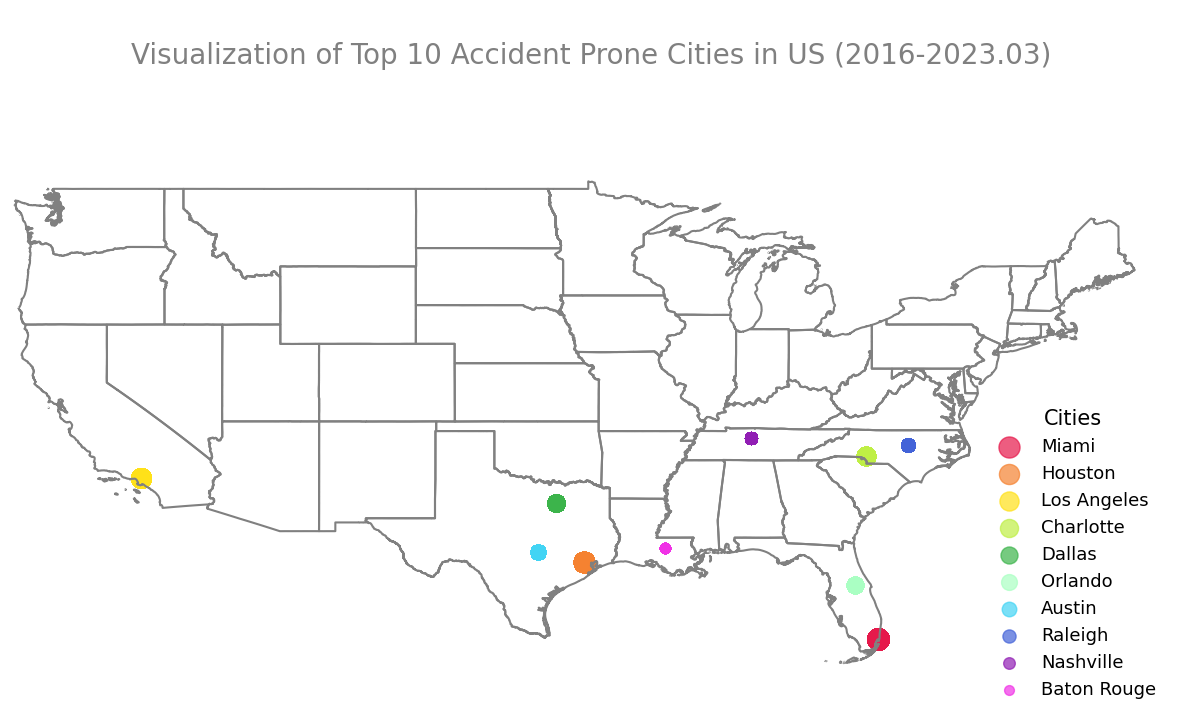

In [128]:
fig, ax = plt.subplots(figsize=(15, 15))

ax.set_xlim([-125, -65])
ax.set_ylim([22, 55])

states.boundary.plot(ax=ax, color='grey')

colors = ['#e6194B','#f58231','#ffe119','#bfef45','#3cb44b', '#aaffc3','#42d4f4','#4363d8','#911eb4','#f032e6']
markersizes = [50+(i*20) for i in range(10)][::-1]

for i in range(10):
    geo_df_cities[geo_df_cities['City'] == top10_list[i]].plot(ax=ax, markersize=markersizes[i], color=colors[i], marker='o', label=top10_list[i], alpha=0.7)
    
plt.legend(prop={'size': 13}, loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5), edgecolor='white', title="Cities", title_fontsize=15)

for i in ['bottom', 'top', 'left', 'right']:
    side = ax.spines[i]
    side.set_visible(False)
    
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)

plt.title('\nVisualization of Top 10 Accident Prone Cities in US (2016-2023.03)', size=20, color='grey')

plt.show()

In [ ]:
# %pip install folium

In [226]:
import folium
from folium.plugins import MarkerCluster

In [215]:
top10_cities_df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,New_Start_Lat,New_Start_Lng
42866,A-42867,Source2,2,2016-06-21 10:46:30,2016-06-21 11:27:00,34.078926,-118.289040,NaN,NaN,0.000,...,False,False,False,False,Day,Day,Day,Day,34.053691,-118.242766
42867,A-42868,Source2,3,2016-06-21 10:49:21,2016-06-21 11:34:21,34.091179,-118.239471,NaN,NaN,0.000,...,False,False,False,False,Day,Day,Day,Day,34.053691,-118.242766
42881,A-42882,Source2,3,2016-06-21 10:51:45,2016-06-21 11:36:45,34.037239,-118.309074,NaN,NaN,0.000,...,False,False,False,False,Day,Day,Day,Day,34.053691,-118.242766
42883,A-42884,Source2,3,2016-06-21 10:56:24,2016-06-21 11:34:00,34.027458,-118.274490,NaN,NaN,0.000,...,False,False,False,False,Day,Day,Day,Day,34.053691,-118.242766
42898,A-42899,Source2,3,2016-06-21 11:30:46,2016-06-21 12:00:46,33.947544,-118.279434,NaN,NaN,0.000,...,False,False,False,False,Day,Day,Day,Day,34.053691,-118.242766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728130,A-7777498,Source1,3,2019-08-23 17:32:09,2019-08-23 18:02:03,29.971810,-95.562340,29.96023,-95.546779,1.228,...,False,False,False,False,Day,Day,Day,Day,29.758938,-95.367697
7728357,A-7777725,Source1,3,2019-08-23 04:04:48,2019-08-23 04:33:53,34.075790,-118.276680,34.07431,-118.272250,0.273,...,False,False,False,False,Night,Night,Night,Night,34.053691,-118.242766
7728361,A-7777729,Source1,2,2019-08-23 12:52:31,2019-08-23 13:20:14,34.023790,-118.276390,34.02576,-118.275290,0.150,...,False,False,False,False,Day,Day,Day,Day,34.053691,-118.242766
7728364,A-7777732,Source1,2,2019-08-23 13:42:50,2019-08-23 14:10:06,34.070610,-118.263910,34.06974,-118.261550,0.148,...,False,False,False,False,Day,Day,Day,Day,34.053691,-118.242766


In [235]:
gdf = gpd.GeoDataFrame(
    top10_cities_df,
    geometry=geometry_cities
)

In [194]:
gdf['New_Start_Lat'].index[0]

42866

In [195]:
gdf['City']

42866      Los Angeles
42867      Los Angeles
42881      Los Angeles
42883      Los Angeles
42898      Los Angeles
              ...     
7728130        Houston
7728357    Los Angeles
7728361    Los Angeles
7728364    Los Angeles
7728376    Los Angeles
Name: City, Length: 1220297, dtype: object

In [205]:
gdf.iloc[0]['New_Start_Lat']

34.0536909

In [218]:
arr = gdf.values
arr[0][47]

-118.242766

In [220]:
arr[0][12]

'Los Angeles'

In [257]:
junctions = df['Junction'].values
junctions

array([False, False, False, ...,  True, False, False])

In [258]:
roundabouts = df['Roundabout'].values
roundabouts

array([False, False, False, ..., False, False, False])

In [259]:
stations = df['Station'].values
stations

array([False, False, False, ..., False, False, False])

In [265]:
cities = set(df['City'].values)
cities

{'Vidal',
 'Crow Agency',
 'Lesterville',
 'Silver Lake',
 'Upper Red Lake',
 'Littlefield',
 'Heilwood',
 'Lakewood',
 'Taylorville',
 'West Brevard',
 'Brandamore',
 'Fiskdale',
 'Marion Station',
 'Keno',
 'Tularosa',
 'Gould City',
 'Lower Lake',
 'Blakeslee',
 'Nodaway',
 'Dyersville',
 'Rosebud',
 'Catherine',
 'Wimauma',
 'Mystic',
 'Castile',
 'Kossuth',
 'Park River',
 'Rices Landing',
 'Emington',
 'La Joya',
 'Bloomburg',
 'Tappen',
 'Mchenry',
 'Pompton Plains',
 'Alvordton',
 'Ellensburg',
 'Ladora',
 'Pinon Hills',
 'Hoffman Estates',
 'Oglethorpe',
 'Frenchtown',
 'Lake Milton',
 'Avinger',
 'Lehighton',
 'Blakely',
 'Cliffwood',
 'Townsend',
 'Berea',
 'Moffit',
 'Honor',
 'Mamaroneck',
 'Eckley',
 'Magazine',
 'Willows',
 'Jerome',
 'New Riegel',
 'St Johns',
 'Selby',
 'Perris',
 'Forney',
 'Blue Island',
 'Fithian',
 'Mt Sidney',
 'Cibola',
 'Pegram',
 'Holtsville',
 'Burlington Junction',
 'Swanquarter',
 'Kountze',
 'Mauldin',
 'Cadillac',
 'Clermont',
 'Queenstown

In [264]:
counties = set(df['County'].values)
counties

{'Emporia',
 'Grays Harbor',
 'York',
 'St. Charles',
 'Costilla',
 'Perry',
 'St. Lucie',
 'Coryell',
 'Flathead',
 'Independence',
 'Chattahoochee',
 'St Joseph',
 'Nodaway',
 'Rosebud',
 'Schenectady',
 'Saratoga',
 'Kossuth',
 'Addison',
 'Clearfield',
 'Scotts Bluff',
 'Mchenry',
 'Augusta',
 'Kanabec',
 'Oglethorpe',
 'Caddo',
 'Latah',
 'Irwin',
 'Sherman',
 'Conejos',
 'Edgefield',
 'Manitowoc',
 'Chouteau',
 'Jerome',
 'Mohave',
 'St Johns',
 'Miami-Dade',
 'Wadena',
 'Mcdowell',
 'Tattnall',
 'Pacific',
 'Northwest Hills',
 'Yancey',
 'Cibola',
 'Randolph',
 'Pamlico',
 'Hardeman',
 'Glades',
 'Newport News City',
 'Fredericksburg (City)',
 'Clermont',
 'Kaufman',
 'Buena Vista (City)',
 'Stewart',
 'Eagle',
 'Ascension',
 'Koochiching',
 'Victoria',
 'De Kalb',
 'Ferry',
 'Berrien',
 'San Augustine',
 'Colonial Heights City',
 'Lewis and Clark',
 'Vance',
 'Griggs',
 'Hamilton',
 'Dallam',
 'Leslie',
 'Fredericksburg City',
 'Jeff Davis',
 'Val Verde',
 'Big Horn',
 'Geauga'

In [256]:
weather_conditions = set(df['Weather_Condition'].values)
weather_conditions

{'Blowing Dust',
 'Blowing Dust / Windy',
 'Blowing Sand',
 'Blowing Snow',
 'Blowing Snow / Windy',
 'Blowing Snow Nearby',
 'Clear',
 'Cloudy',
 'Cloudy / Windy',
 'Drifting Snow',
 'Drifting Snow / Windy',
 'Drizzle',
 'Drizzle / Windy',
 'Drizzle and Fog',
 'Dust Whirls',
 'Duststorm',
 'Fair',
 'Fair / Windy',
 'Fog',
 'Fog / Windy',
 'Freezing Drizzle',
 'Freezing Rain',
 'Freezing Rain / Windy',
 'Funnel Cloud',
 'Hail',
 'Haze',
 'Haze / Windy',
 'Heavy Blowing Snow',
 'Heavy Drizzle',
 'Heavy Freezing Drizzle',
 'Heavy Freezing Rain',
 'Heavy Freezing Rain / Windy',
 'Heavy Ice Pellets',
 'Heavy Rain',
 'Heavy Rain / Windy',
 'Heavy Rain Shower',
 'Heavy Rain Shower / Windy',
 'Heavy Rain Showers',
 'Heavy Sleet',
 'Heavy Sleet / Windy',
 'Heavy Sleet and Thunder',
 'Heavy Smoke',
 'Heavy Snow',
 'Heavy Snow / Windy',
 'Heavy Snow with Thunder',
 'Heavy T-Storm',
 'Heavy T-Storm / Windy',
 'Heavy Thunderstorms and Rain',
 'Heavy Thunderstorms and Snow',
 'Heavy Thunderstorms w

In [ ]:
# m = create_map(gdf, gdf.iloc[0]['New_Start_Lat'], gdf.iloc[0]['New_Start_Lng'], 5)

In [238]:
# 지도 생성, 초기 위치는 첫 번째 위치로 설정
m = folium.Map(location=[gdf.iloc[0]['New_Start_Lat'], gdf.iloc[0]['New_Start_Lng']], zoom_start=5)
folium.Marker(
    location=[gdf.iloc[0]['New_Start_Lat'], gdf.iloc[0]['New_Start_Lng']],
    popup=gdf.iloc[0]['City'],
    tooltip=gdf.iloc[0]['City']
).add_to(m)

## TODO GeoDataFrame을 순회하며 마커 추가

# 지도를 HTML 파일로 저장
# m.save("map_with_markers.html")
m

In [129]:
city_df.shape[0]

13678

In [132]:
def city_cases_percent(val, operator):
    if operator == '<' :
        res = city_df[city_df['Cases'] < val].shape[0]
    elif operator == '>' :
        res = city_df[city_df['Cases'] > val].shape[0]
    elif operator == '=' :
        res = city_df[city_df['Cases'] == val].shape[0]
    else:
        pass
    print(f"{res} Cities, {round(res*100/city_df.shape[0],  2)}%")

In [133]:
city_cases_percent(1, '=')
city_cases_percent(100, '<')
city_cases_percent(1000, '<')
city_cases_percent(1000, '>')
city_cases_percent(5000, '>')
city_cases_percent(10000, '>')

1023 Cities, 7.48%
8947 Cities, 65.41%
12460 Cities, 91.1%
1215 Cities, 8.88%
231 Cities, 1.69%
105 Cities, 0.77%


## State

In [134]:
# create a dictionary using US State code and their corresponding Name
us_states = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AS': 'American Samoa',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'GU': 'Guam',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MP': 'Northern Mariana Islands',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'PR': 'Puerto Rico',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VI': 'Virgin Islands',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
    }


In [155]:
state_df = pd.DataFrame(df['State'].value_counts()).reset_index().rename(columns={'index':'State', 'State': 'Cases'})
state_df

,State,Cases
0,CA,1741433
1,FL,880192
2,TX,582837
3,SC,382557
4,NY,347960
5,NC,338199
6,VA,303301
7,PA,296620
8,MN,192084
9,OR,179660


In [156]:
state_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   49 non-null     object
 1   Cases   49 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 916.0+ bytes


In [157]:
def convert(x) : return us_states[x]

In [158]:
state_df['State'] = state_df['State'].apply(func=convert)

In [159]:
state_df

,State,Cases
0,California,1741433
1,Florida,880192
2,Texas,582837
3,South Carolina,382557
4,New York,347960
5,North Carolina,338199
6,Virginia,303301
7,Pennsylvania,296620
8,Minnesota,192084
9,Oregon,179660


In [161]:
top10_states_name = list(state_df['State'].head(10))
top10_states_name

['California',
 'Florida',
 'Texas',
 'South Carolina',
 'New York',
 'North Carolina',
 'Virginia',
 'Pennsylvania',
 'Minnesota',
 'Oregon']

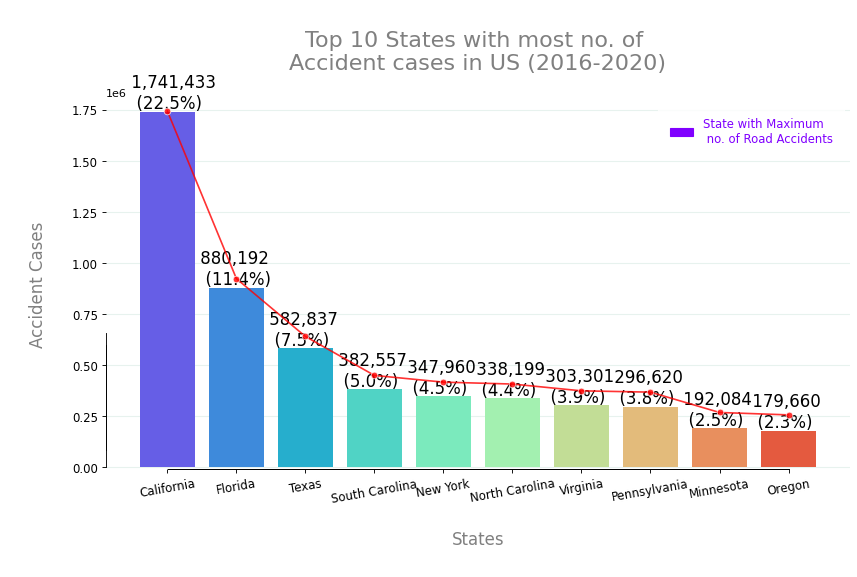

In [248]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

cmap = cm.get_cmap('rainbow', 10)   
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(y=state_df['Cases'].head(10), x=state_df['State'].head(10), palette='rainbow')
ax1 = ax.twinx()
# [ ] lineplot이 의미하는 것??
sns.lineplot(data = state_df[:10], marker='o', x='State', y='Cases', color = 'red', alpha = .8)


total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x()-0.2, i.get_height()+15000, \
            ' {:,d}\n  ({}%) '.format(int(i.get_height()), round(100*i.get_height()/total, 1)), fontsize=15, color='black')


ax.set(ylim =(-10000, 1800000))
ax1.set(ylim =(-100000, 1800000))

plt.title('\nTop 10 States with most no. of \nAccident cases in US (2016-2023.03)\n', size=20, color='grey')
ax1.axes.yaxis.set_visible(False)
ax.set_xlabel('\nStates\n', fontsize=15, color='grey')
ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')

for i in ['top','right']:
    side1 = ax.spines[i]
    side1.set_visible(False)
    side2 = ax1.spines[i]
    side2.set_visible(False)
    
ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)

ax.spines['bottom'].set_bounds(0.005, 9)
ax.spines['left'].set_bounds(0, 600000)
ax1.spines['bottom'].set_bounds(0.005, 9)
ax1.spines['left'].set_bounds(0, 600000)
ax.tick_params(axis='y', which='major', labelsize=10.6)
ax.tick_params(axis='x', which='major', labelsize=10.6, rotation=10)

MA = mpatches.Patch(color=clrs[0], label='State with Maximum\n no. of Road Accidents')
ax.legend(handles=[MA], prop={'size': 10.5}, loc='best', borderpad=1, labelcolor=clrs[0], edgecolor='white')

In [250]:
geometry = [Point(xy) for xy in zip(df['Start_Lng'], df['Start_Lat'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

geo_df['year'] = geo_df.Start_Time.dt.year
geo_df['State'] = geo_df['State'].apply(func=convert)


TypeError: Axes.annotate() missing 1 required positional argument: 'text'

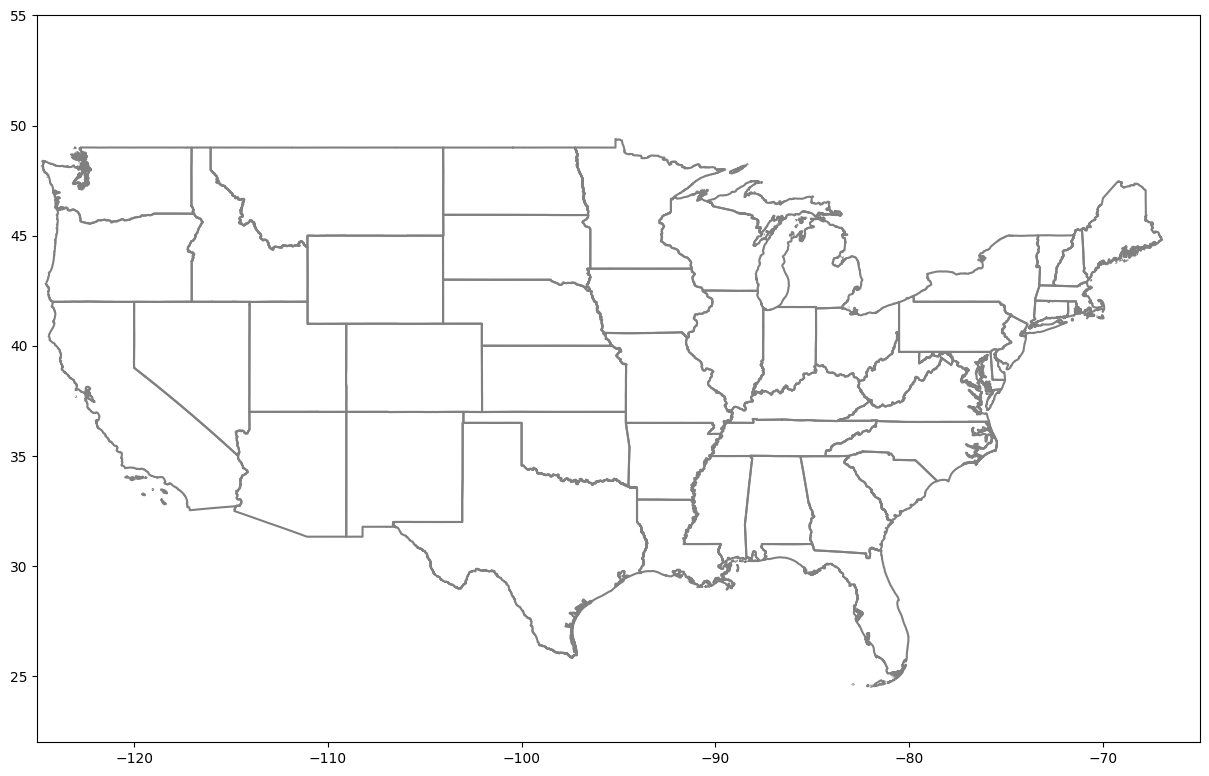

In [253]:
fig, ax = plt.subplots(figsize=(15,15))
ax.set_xlim([-125,-65])
ax.set_ylim([22,55])

states.boundary.plot(ax=ax, color='grey')
states.apply(lambda x: None if (x.NAME not in top10_states_name) else ax.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', color='black', weight='bold', fontsize=12.5), axis=1)

colors = ['#FF5252','#9575CD','#FF8A80','#FF4081','#FFEE58','#7C4DFF','#00E5FF','#81D4FA','#64FFDA','#8C9EFF']
count = 0
for i in list(state_df['State'].head(10)):
    geo_df[geo_df['State'] == i].plot(ax=ax, markersize=1, color=colors[count], marker='o');
    count += 1

for i in ['bottom', 'top', 'left', 'right']:
    side = ax.spines[i]
    side.set_visible(False)
    
plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)

plt.title('\nVisualization of Top 10 Accident Prone States in US (2016-2020)', size=20, color='grey');